In [ ]:

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import de modelo preditivo de regressão para comparar os resultados no final
from sklearn.linear_model import LinearRegression

In [ ]:
# Caminho do arquivo
url = "https://github.com/viniciusandradee/ABXTecnologia/raw/main/solicitacoescredito.csv"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

# TRATAMENTO DE DADOS

In [ ]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [ ]:
# Quais os tipos? Dados faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [ ]:
# Quantos dados únicos
df.nunique()

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [ ]:
# Removendo dados duplicados
#df.drop_duplicates(inplace=True)
#df.shape

In [ ]:
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [ ]:
# Verificar dados faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir as colunas com dados faltantes
print(dados_faltantes[dados_faltantes > 0])

percentualProtestos            1498
primeiraCompra                  106
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                     750
periodoDemonstrativoEmMeses     750
custos                          750
anoFundacao                     745
intervaloFundacao               745
capitalSocial                   745
restricoes                      745
empresa_MeEppMei                745
limiteEmpresaAnaliseCredito     745
dataAprovadoNivelAnalista      1962
dtype: int64


In [ ]:
# Lista de colunas de tempo
tempo = ['primeiraCompra', 'dataAprovadoEmComite', 'periodoBalanco', 'anoFundacao', 'intervaloFundacao', 'dataAprovadoNivelAnalista']


In [ ]:
# Preenchendo valores faltantes para frente para colunas de tempo
for col in tempo:
    df[col].fillna(method='ffill', inplace=True)

In [ ]:
# Lista de colunas categóricas
categorias = ['restricoes', 'empresa_MeEppMei']

In [ ]:
# Preenchendo valores faltantes com o valor mais comum para colunas categóricas
for col in categorias:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
dados_faltantes_atualizados = df.isnull().sum()
print(dados_faltantes_atualizados[dados_faltantes_atualizados > 0])

percentualProtestos            1498
valorAprovado                  1404
dataAprovadoEmComite             11
periodoBalanco                    4
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                     750
periodoDemonstrativoEmMeses     750
custos                          750
capitalSocial                   745
limiteEmpresaAnaliseCredito     745
dtype: int64


In [ ]:
# Preenchendo valores faltantes com a mediana para a coluna 'periodoDemonstrativoEmMeses'
mediana_periodo = df['periodoDemonstrativoEmMeses'].median()
df['periodoDemonstrativoEmMeses'].fillna(mediana_periodo, inplace=True)

# Verificar se ainda existem dados faltantes
dados_faltantes_atualizados = df.isnull().sum()
print(dados_faltantes_atualizados[dados_faltantes_atualizados > 0])


percentualProtestos            1498
valorAprovado                  1404
dataAprovadoEmComite             11
periodoBalanco                    4
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                     750
custos                          750
capitalSocial                   745
limiteEmpresaAnaliseCredito     745
dtype: int64


In [ ]:
# Preenchendo valores faltantes para frente para a coluna 'dataAprovadoEmComite'
df['dataAprovadoEmComite'].fillna(method='ffill', inplace=True)

In [ ]:
# Converter coluna 'dataAprovadoEmComite' para o tipo datetime
df['dataAprovadoEmComite'] = pd.to_datetime(df['dataAprovadoEmComite'], errors='coerce')

# Preenchendo valores faltantes com a média para a coluna 'dataAprovadoEmComite'
media_data_aprovado = df['dataAprovadoEmComite'].mean()
df['dataAprovadoEmComite'].fillna(media_data_aprovado, inplace=True)


In [ ]:
# Excluir linhas onde 'periodoBalanco' é NaN
df.dropna(subset=['periodoBalanco'], inplace=True)

In [ ]:
# Verificar se ainda existem dados faltantes
dados_faltantes_atualizados = df.isnull().sum()
print(dados_faltantes_atualizados[dados_faltantes_atualizados > 0])

percentualProtestos            1496
valorAprovado                  1403
ativoCirculante                4236
passivoCirculante              4236
totalAtivo                     4236
totalPatrimonioLiquido         4236
endividamento                  4236
duplicatasAReceber             4236
estoque                        4236
faturamentoBruto                749
margemBruta                     749
custos                          749
capitalSocial                   744
limiteEmpresaAnaliseCredito     744
dtype: int64


In [ ]:
df['valorSolicitadoMaior'] = df['valorSolicitado'].astype(float) > df['limiteEmpresaAnaliseCredito'].astype(float)

In [ ]:
# Verificar dados faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir as colunas com dados faltantes
print(dados_faltantes[dados_faltantes > 0])

percentualProtestos            1496
valorAprovado                  1403
ativoCirculante                4236
passivoCirculante              4236
totalAtivo                     4236
totalPatrimonioLiquido         4236
endividamento                  4236
duplicatasAReceber             4236
estoque                        4236
faturamentoBruto                749
margemBruta                     749
custos                          749
capitalSocial                   744
limiteEmpresaAnaliseCredito     744
dtype: int64


In [ ]:
# Lista de colunas financeiras
financeiras = ['percentualProtestos', 'valorAprovado', 'ativoCirculante', 'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber', 'estoque', 'faturamentoBruto', 'margemBruta', 'custos', 'capitalSocial', 'limiteEmpresaAnaliseCredito']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8969 entries, 4 to 8972
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   numero_solicitacao           8969 non-null   int64         
 1   razaoSocial                  8969 non-null   object        
 2   nomeFantasia                 8969 non-null   object        
 3   cnpjSemTraco                 8969 non-null   object        
 4   maiorAtraso                  8969 non-null   int64         
 5   margemBrutaAcumulada         8969 non-null   float64       
 6   percentualProtestos          7473 non-null   float64       
 7   primeiraCompra               8969 non-null   object        
 8   prazoMedioRecebimentoVendas  8969 non-null   int64         
 9   titulosEmAberto              8969 non-null   float64       
 10  valorSolicitado              8969 non-null   float64       
 11  status                       8969 non-null   obj

In [ ]:
# Preenchendo valores faltantes com a média para colunas financeiras
for col in financeiras:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    media = df[col].mean()
    df[col].fillna(media, inplace=True)


In [ ]:
df['limiteEmpresaAnaliseCredito'] = df['limiteEmpresaAnaliseCredito'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
df['valorSolicitado'] = pd.to_numeric(df['valorSolicitado'], errors='coerce')
df['valorSolicitado'] = df['valorSolicitado'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
# Verificar dados faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir as colunas com dados faltantes
print(dados_faltantes[dados_faltantes > 0])

Series([], dtype: int64)


# **EXPLORAÇÃO DE DADOS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8969 entries, 4 to 8972
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   numero_solicitacao           8969 non-null   int64         
 1   razaoSocial                  8969 non-null   object        
 2   nomeFantasia                 8969 non-null   object        
 3   cnpjSemTraco                 8969 non-null   object        
 4   maiorAtraso                  8969 non-null   int64         
 5   margemBrutaAcumulada         8969 non-null   float64       
 6   percentualProtestos          8969 non-null   float64       
 7   primeiraCompra               8969 non-null   object        
 8   prazoMedioRecebimentoVendas  8969 non-null   int64         
 9   titulosEmAberto              8969 non-null   float64       
 10  valorSolicitado              8969 non-null   object        
 11  status                       8969 non-null   obj

In [ ]:
print(df.head())

   numero_solicitacao            razaoSocial        nomeFantasia  \
4                   5              Nigel Lee  Dr. Stanley Duncan   
5                   6           Liam Jackson       Gerard Gordon   
6                   7  Alexander Baker-Wells    Dr. Caroline Ali   
7                   8             Jean Berry       Gregory Gould   
8                   9      Elliot Stephenson       Adrian Graham   

         cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  percentualProtestos  \
4  CGQN15826802440348           20              0.454088             0.000000   
5  KAYS53232027306925            0              0.000000             0.019266   
6  PYOL43118620147076           16              0.000000             0.019266   
7  NLUX93496216176463            4              0.350175             0.000000   
8  LOVL82962402474134           43              0.245818             0.000000   

        primeiraCompra  prazoMedioRecebimentoVendas  titulosEmAberto  ...  \
4  2010-07-13T00:00:00     

In [ ]:
print(df['maiorAtraso'].head)


<bound method NDFrame.head of 4        20
5         0
6        16
7         4
8        43
       ... 
8968    149
8969     23
8970      3
8971     11
8972      4
Name: maiorAtraso, Length: 8969, dtype: int64>


In [ ]:
print(df['percentualProtestos'].head(20))


4     0.000000
5     0.019266
6     0.019266
7     0.000000
8     0.000000
9     0.000000
10    0.019266
11    0.019266
12    0.019266
13    0.019266
14    0.000000
15    0.019266
16    0.019266
17    0.000000
18    0.019266
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: percentualProtestos, dtype: float64


In [ ]:
# Para colunas numéricas
print(df['valorSolicitado'].head(20))


4       50000.00
5       25000.00
6      100000.00
7      300000.00
8      400000.00
9       50000.00
10    1000000.00
11     200000.00
12    1138000.00
13     350000.00
14     200000.00
15     750000.00
16    3900000.00
17      40000.00
18     350000.00
19    2000000.00
20      34000.00
21     350000.00
22      50000.00
23     320000.00
Name: valorSolicitado, dtype: object


In [ ]:
print(df['primeiraCompra'].head(20))


4     2010-07-13T00:00:00
5     2019-06-28T10:25:57
6     2011-03-02T11:27:13
7     2007-07-02T00:00:00
8     2006-07-10T00:00:00
9     2011-02-24T00:00:00
10    2012-02-24T16:01:26
11    2017-12-20T17:03:32
12    2019-10-10T11:47:29
13    2006-05-01T13:18:05
14    2019-03-08T00:00:00
15    2011-08-08T11:28:00
16    2009-05-30T11:49:31
17    2018-07-10T00:00:00
18    2018-06-13T17:43:00
19    2016-01-20T00:00:00
20    2017-11-22T00:00:00
21    2014-03-31T00:00:00
22    2013-02-18T00:00:00
23    2017-09-06T00:00:00
Name: primeiraCompra, dtype: object


In [ ]:
print(df['titulosEmAberto'].head(20))


4       1486.95
5          0.00
6          0.00
7     208980.00
8       6432.00
9      22733.33
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20     12882.35
21      2400.02
22         0.00
23     46949.30
Name: titulosEmAberto, dtype: float64


In [ ]:
print(df['status'].head(20))

4          AprovadoAnalista
5          AprovadoAnalista
6          AprovadoAnalista
7          AprovadoAnalista
8          AprovadoAnalista
9     DocumentacaoReprovada
10         AprovadoAnalista
11           AprovadoComite
12         AprovadoAnalista
13    DocumentacaoReprovada
14         AprovadoAnalista
15         AprovadoAnalista
16         AprovadoAnalista
17    DocumentacaoReprovada
18         AprovadoAnalista
19         AprovadoAnalista
20         AprovadoAnalista
21           AprovadoComite
22         AprovadoAnalista
23           AprovadoComite
Name: status, dtype: object


In [ ]:
print(df['percentualRisco'].head(20))
print(df['definicaoRisco'].head(20))
print(df['diferencaPercentualRisco'].head(20))

4     0.169811
5     0.377358
6     0.415094
7     0.056604
8     0.113208
9     0.000000
10    0.396226
11    0.415094
12    0.490566
13    0.000000
14    0.207547
15    0.396226
16    0.377358
17    0.000000
18    0.301887
19    0.113208
20    0.433962
21    0.528302
22    0.320755
23    0.433962
Name: percentualRisco, dtype: float64
4          De 11 a 30 % - Baixo
5          De 31 a 50 % - Médio
6          De 31 a 50 % - Médio
7     De 0 a 10 % - Muito Baixo
8          De 11 a 30 % - Baixo
9     De 0 a 10 % - Muito Baixo
10         De 31 a 50 % - Médio
11         De 31 a 50 % - Médio
12         De 31 a 50 % - Médio
13    De 0 a 10 % - Muito Baixo
14         De 11 a 30 % - Baixo
15         De 31 a 50 % - Médio
16         De 31 a 50 % - Médio
17    De 0 a 10 % - Muito Baixo
18         De 11 a 30 % - Baixo
19         De 11 a 30 % - Baixo
20         De 31 a 50 % - Médio
21          De 51 a 80 % - Alto
22         De 31 a 50 % - Médio
23         De 31 a 50 % - Médio
Name: definicaoRisco, 

In [ ]:
print(df['ativoCirculante'].head(10))
print(df['passivoCirculante'].head(10))
print(df['totalAtivo'].head(10))
print(df['totalPatrimonioLiquido'].head(10))
print(df['endividamento'].head(10))


4     1.475892e+07
5     4.451028e+07
6     4.451028e+07
7     1.780161e+07
8     3.682769e+07
9     4.451028e+07
10    2.127907e+06
11    5.369982e+06
12    4.451028e+07
13    4.451028e+07
Name: ativoCirculante, dtype: float64
4     1.214903e+07
5     3.396815e+07
6     3.396815e+07
7     2.538069e+06
8     1.384320e+07
9     3.396815e+07
10    7.042450e+05
11    6.118711e+06
12    3.396815e+07
13    3.396815e+07
Name: passivoCirculante, dtype: float64
4     2.579341e+07
5     7.073623e+07
6     7.073623e+07
7     1.941578e+07
8     3.945594e+07
9     7.073623e+07
10    3.609498e+06
11    5.595689e+06
12    7.073623e+07
13    7.073623e+07
Name: totalAtivo, dtype: float64
4     1.454438e+07
5     2.831172e+07
6     2.831172e+07
7     7.519758e+06
8     2.561275e+07
9     2.831172e+07
10    2.538787e+06
11   -7.208440e+05
12    2.831172e+07
13    2.831172e+07
Name: totalPatrimonioLiquido, dtype: float64
4     3.039112e+06
5     4.687958e+06
6     4.687958e+06
7     0.000000e+00
8     0.

In [ ]:
print(df['restricoes'].head(10))


4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: restricoes, dtype: bool


In [ ]:
print(df['valorSolicitado'].head(10))

print(df['limiteEmpresaAnaliseCredito'].head(10))

print(df['valorSolicitadoMaior'].head(10))

4       50000.00
5       25000.00
6      100000.00
7      300000.00
8      400000.00
9       50000.00
10    1000000.00
11     200000.00
12    1138000.00
13     350000.00
Name: valorSolicitado, dtype: object
4        89000.00
5        38400.00
6     18132588.00
7       768233.00
8      6910219.00
9      2852050.03
10       81000.00
11      183509.00
12       33000.00
13     2852050.03
Name: limiteEmpresaAnaliseCredito, dtype: object
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13    False
Name: valorSolicitadoMaior, dtype: bool


In [ ]:
# Para colunas categóricas
for col in categorias:
    print(df[col].value_counts())

restricoes
False    8199
True      770
Name: count, dtype: int64
empresa_MeEppMei
False    5790
True     3179
Name: count, dtype: int64


In [ ]:
# Exemplo de análise bivariada
df.groupby('endividamento')['estoque'].mean()


endividamento
0.0            4.523156e+06
1.0            1.000000e+00
1000.0         0.000000e+00
1036.0         9.159400e+04
1500.0         2.445120e+06
                   ...     
648000000.0    1.293428e+09
649214000.0    1.293428e+09
688500000.0    1.293428e+09
721096000.0    5.124730e+08
740631476.0    3.758090e+08
Name: estoque, Length: 1186, dtype: float64

In [ ]:
# Contar os valores nulos ou NaT
print(df['periodoBalanco'].isna().sum())

# Imputar valores nulos ou NaT com uma data específica
df['periodoBalanco'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

0


In [ ]:
# Supondo que YYYY-MM-DD seja o formato válido
df['periodoBalanco'] = pd.to_datetime(df['periodoBalanco'], errors='coerce')


                             percentualProtestos  valorAprovado  \
percentualProtestos                     1.000000      -0.005423   
valorAprovado                          -0.005423       1.000000   
ativoCirculante                         0.000558       0.071039   
passivoCirculante                       0.000573       0.044046   
totalAtivo                              0.000529       0.055319   
totalPatrimonioLiquido                  0.000816       0.079409   
endividamento                           0.001357       0.109910   
duplicatasAReceber                      0.000186       0.039039   
estoque                                 0.001544       0.158998   
faturamentoBruto                        0.011659       0.186629   
margemBruta                            -0.001929       0.172656   
custos                                 -0.001650       0.197246   
capitalSocial                          -0.001919       0.335289   
limiteEmpresaAnaliseCredito            -0.001721       0.24033

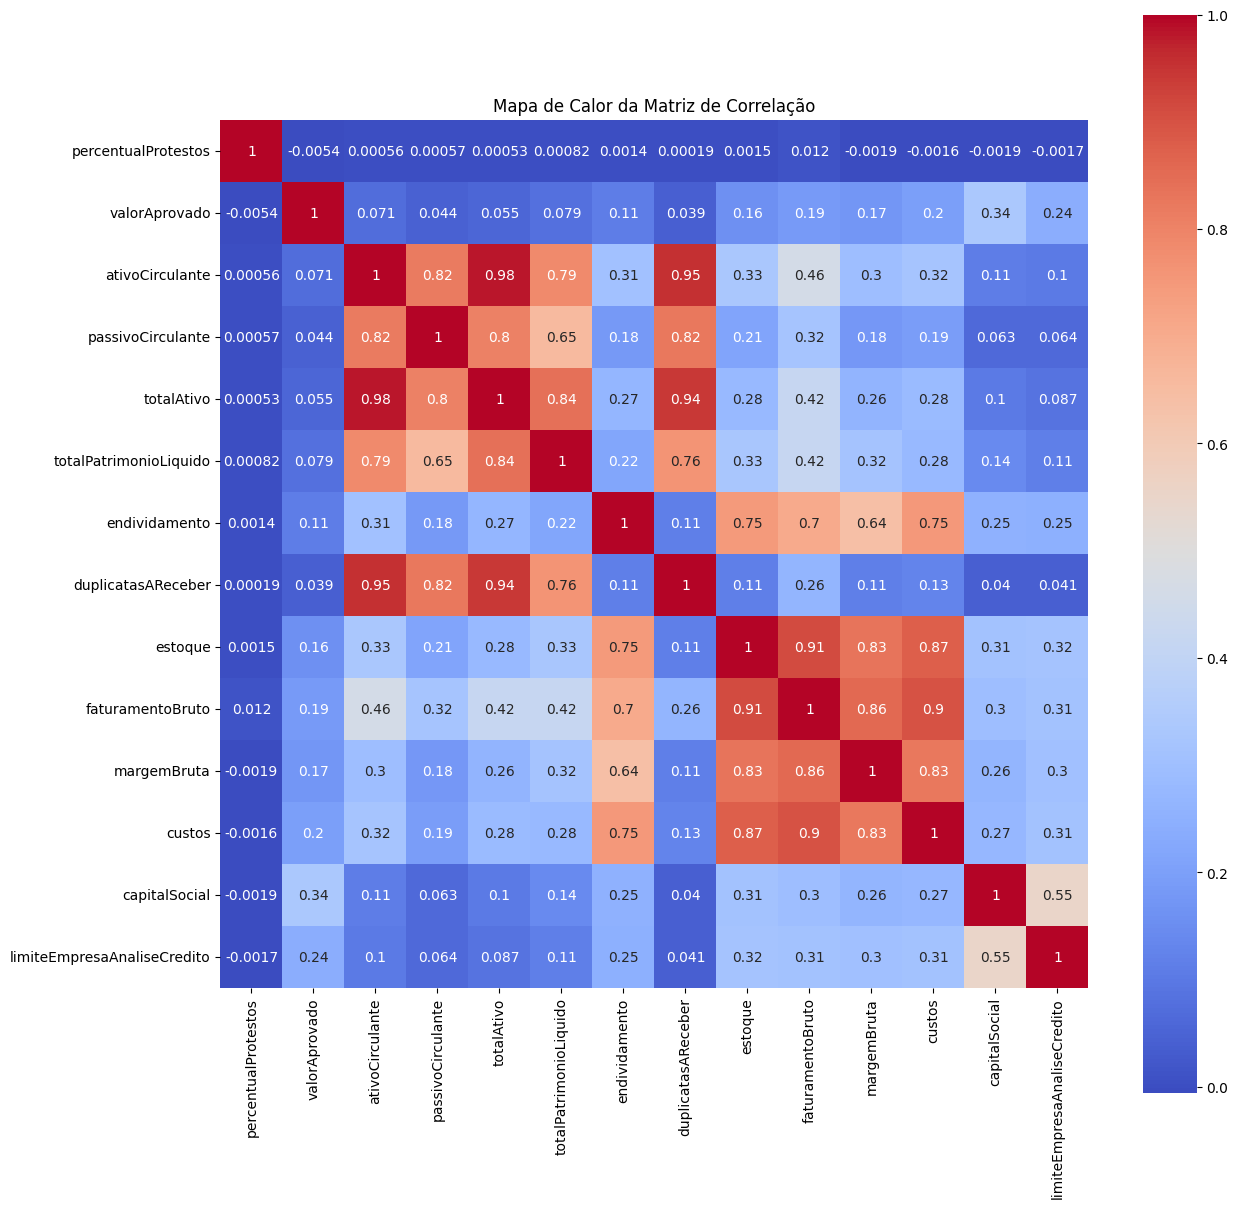

In [ ]:
# Calcular a matriz de correlação
correlation = df[financeiras].corr()

# Exibir a matriz de correlação
print(correlation)

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(14, 14))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()


In [ ]:
print(df['status'].value_counts())

status
AprovadoAnalista         7008
ReprovadoAnalista         590
AprovadoComite            558
DocumentacaoReprovada     503
EmAnaliseDocumentacao     289
ReprovadoComite            20
AguardandoAprovacao         1
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8969 entries, 4 to 8972
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   numero_solicitacao           8969 non-null   int64         
 1   razaoSocial                  8969 non-null   object        
 2   nomeFantasia                 8969 non-null   object        
 3   cnpjSemTraco                 8969 non-null   object        
 4   maiorAtraso                  8969 non-null   int64         
 5   margemBrutaAcumulada         8969 non-null   float64       
 6   percentualProtestos          8969 non-null   float64       
 7   primeiraCompra               8969 non-null   object        
 8   prazoMedioRecebimentoVendas  8969 non-null   int64         
 9   titulosEmAberto              8969 non-null   float64       
 10  valorSolicitado              8969 non-null   object        
 11  status                       8969 non-null   obj

# **Exercício 1**

In [ ]:
# Lista das colunas que você quer manter
colunas_manter = ['status', 'valorSolicitadoMaior', 'maiorAtraso', 'percentualProtestos', 'percentualRisco', 'restricoes', 'valorAprovado']

# Descartando as outras colunas
df = df[colunas_manter]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8969 entries, 4 to 8972
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   status                8969 non-null   object 
 1   valorSolicitadoMaior  8969 non-null   bool   
 2   maiorAtraso           8969 non-null   int64  
 3   percentualProtestos   8969 non-null   float64
 4   percentualRisco       8969 non-null   float64
 5   restricoes            8969 non-null   bool   
 6   valorAprovado         8969 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(1)
memory usage: 437.9+ KB


In [ ]:
def definir_credito_aprovado(linha):
    if linha['status'] == 'AprovadoAnalista':
        return 1
    elif linha['status'] == 'AprovadoComite':
        return 1
    elif linha['status'] == 'AguardandoAprovacao' and linha['valorSolicitadoMaior'] == False:
        if linha['maiorAtraso'] < 30 and linha['percentualProtestos'] == 0 and linha['percentualRisco'] < 0.3 and linha['restricoes'] == False:
            return 1
        else:
            return 0
    else:
        return 0

df['creditoAprovado'] = df.apply(definir_credito_aprovado, axis=1)


In [ ]:
print(df['creditoAprovado'].head(20))

4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    1
19    1
20    1
21    1
22    1
23    1
Name: creditoAprovado, dtype: int64


# **Exercício 2**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Definindo as variáveis independentes e dependentes
X = df[['maiorAtraso', 'percentualProtestos', 'percentualRisco', 'restricoes', 'valorSolicitadoMaior']]
y = df['creditoAprovado']


In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definindo os hiperparâmetros que queremos ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Criando o modelo
modelo_rf = RandomForestClassifier(random_state=42)

In [ ]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Treinando o modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Imprimindo os melhores hiperparâmetros
print('Melhores hiperparâmetros:', grid_search.best_params_)

Melhores hiperparâmetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Fazendo previsões no conjunto de teste com o melhor modelo
y_pred = grid_search.predict(X_test)

In [ ]:
# Calculando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)

print('Acurácia do modelo RandomForest com hiperparâmetros ajustados:', acuracia)

Acurácia do modelo RandomForest com hiperparâmetros ajustados: 0.9292084726867336


# **Exercício 3**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
# Definindo as variáveis independentes e dependentes
X = df[['maiorAtraso', 'percentualProtestos', 'percentualRisco', 'restricoes', 'valorSolicitadoMaior']]
y = df['valorAprovado']

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definindo os hiperparâmetros que queremos ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Criando o modelo
modelo = RandomForestRegressor(random_state=42)

In [ ]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Treinando o modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Imprimindo os melhores hiperparâmetros
print('Melhores hiperparâmetros:', grid_search.best_params_)
# Fazendo previsões no conjunto de teste com o melhor modelo
y_pred = grid_search.predict(X_test)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Calculando o erro quadrático médio do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print('Erro Quadrático Médio (MSE) do modelo:', mse)
print('Raiz do Erro Quadrático Médio (RMSE) do modelo:', rmse)

Erro Quadrático Médio (MSE) do modelo: 151544276239.81696
Raiz do Erro Quadrático Médio (RMSE) do modelo: 389286.881669312


In [ ]:
media = df['valorAprovado'].mean()
desvio_padrao = df['valorAprovado'].std()

print('Média da variável alvo:', media)
print('Desvio padrão da variável alvo:', desvio_padrao)

Média da variável alvo: 189856.59727729316
Desvio padrão da variável alvo: 499286.11252922233
